# Data Analysis
### This notebook contains the methods used in exploration of the dataset

---

In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [2]:
#Read .csv file to pandas dataframe
df = pd.read_csv('https://raw.githubusercontent.com/lstetson30/Crohns-Disease-Treatment-Study/main/crohns_cleaned_data.csv')
df.head()

,ID,nrAdvE,BMI,height,country,sex,age,weight,treat,success
0,19908,4,25.22,163,c1,F,47,67,placebo,0
1,19909,4,23.80,164,c1,F,53,64,d1,0
2,19910,1,23.05,164,c1,F,68,62,placebo,0
3,20908,1,25.71,165,c1,F,48,70,d2,0
4,20909,2,25.95,170,c1,F,67,75,placebo,0


This data has been verified for completeness (see Crohns_Disease_Treatment_Data_Collection_Cleaning notebook).
The IDs will be removed since they are not relevant.

In [3]:
df.drop(['ID'], axis = 1, inplace = True)

---

## Data Visualization

##### Check that there is no bias in treatment based on sex:

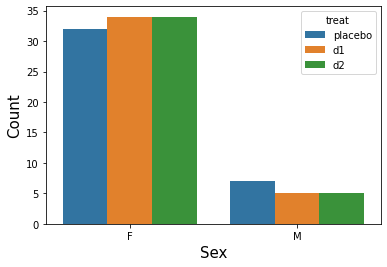

In [4]:
sns.countplot(x="sex", hue='treat',data=df)
plt.xlabel("Sex",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

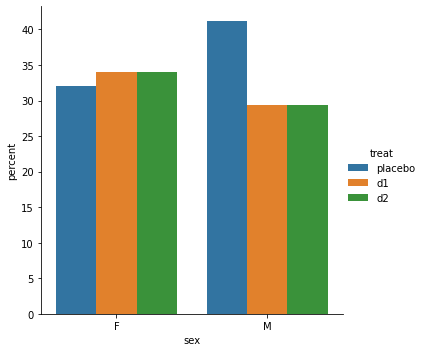

In [5]:
(df.groupby('sex')['treat'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
 .pipe((sns.catplot,'data'), x='sex',y='percent',hue='treat',kind='bar', hue_order=['placebo', 'd1', 'd2']))

---

##### Check that there is no bias in treatment based on age:

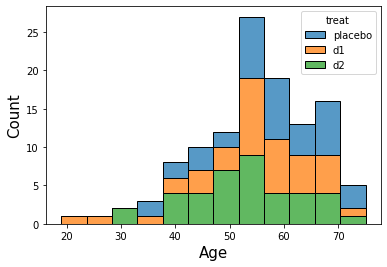

In [6]:
sns.histplot(x="age", hue='treat',multiple = 'stack', data=df, bins = 12)
plt.xlabel("Age",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

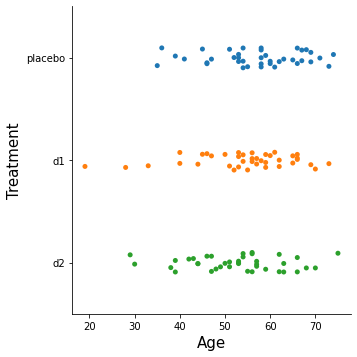

In [7]:
sns.catplot(y="treat", x = 'age', data=df)
plt.xlabel("Age",fontsize=15)
plt.ylabel("Treatment",fontsize=15)
plt.show()

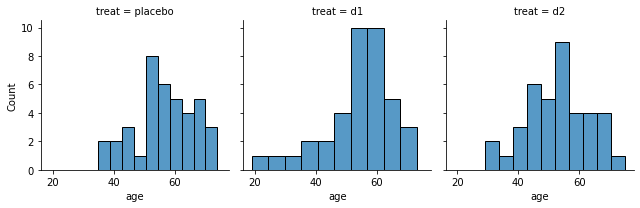

In [8]:
g = sns.FacetGrid(df, col="treat")
g.map(sns.histplot, "age", bins = 10)

Although no patients under the age of 30 received the placebo, the treatment seems to be distributed indiscriminately with regard to age.

---

##### Check that there is no bias in treatment based on height, weight, or BMI:

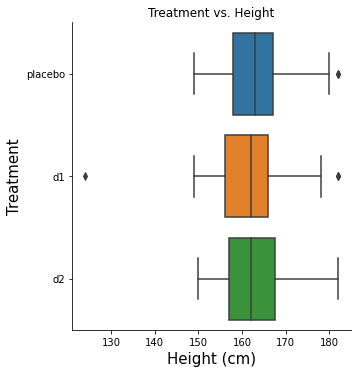

In [9]:
sns.catplot(y="treat", x='height', kind='box', data=df)
plt.xlabel("Height (cm)",fontsize=15)
plt.ylabel("Treatment",fontsize=15)
plt.title('Treatment vs. Height')
plt.show()

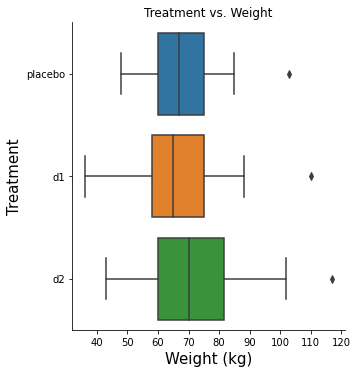

In [10]:
sns.catplot(y="treat", x='weight', kind='box',data=df)
plt.xlabel("Weight (kg)",fontsize=15)
plt.ylabel("Treatment",fontsize=15)
plt.title('Treatment vs. Weight')
plt.show()

The categorical box plots seem to show no bias based on height or weight.

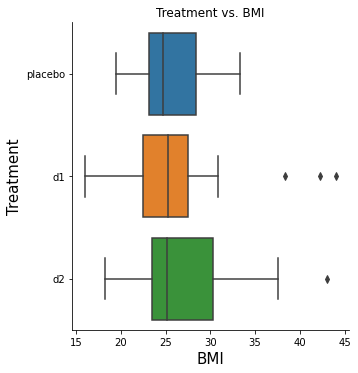

In [11]:
sns.catplot(y="treat", x = 'BMI', kind='box', data=df)
plt.xlabel("BMI",fontsize=15)
plt.ylabel("Treatment",fontsize=15)
plt.title('Treatment vs. BMI')
plt.show()

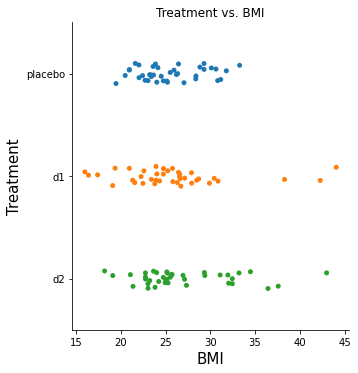

In [12]:
sns.catplot(y="treat", x = 'BMI', data=df)
plt.xlabel("BMI",fontsize=15)
plt.ylabel("Treatment",fontsize=15)
plt.title('Treatment vs. BMI')
plt.show()

It should be noted that no patients with a BMI above 35 or below 20 received the placebo. Also, the placebo and d2 treatments are skewed right. If there is a strong correlation between BMI and patient outcome (previously defined success or number of adverse events) independent of treatment, models may incorrectly attribute this correlation to treatment type.  In this case, however, the treatment distribution disproportion is not major. 

---

## Impact of Various Attributes on Patient Outcome (Visualization)

### The effect of BMI on Adverse Events

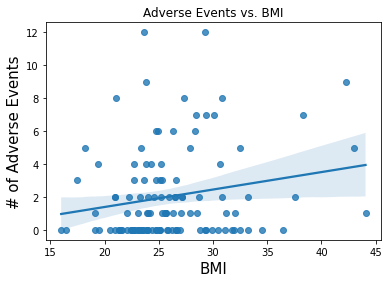

In [13]:
sns.regplot(x='BMI', y='nrAdvE', data=df)
plt.xlabel("BMI",fontsize=15)
plt.ylabel("# of Adverse Events",fontsize=15)
plt.title('Adverse Events vs. BMI')
plt.show()

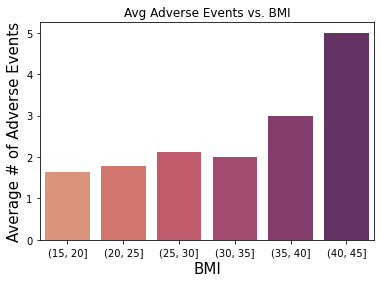

In [14]:
bins = pd.cut(df['BMI'], [15,20,25,30,35,40,45])
df1 = df.groupby(by=bins).agg(avg_advEvents=('nrAdvE', 'mean'))
sns.barplot(x=df1.index, y='avg_advEvents', data=df1, palette=sns.color_palette('flare'))
plt.xlabel("BMI",fontsize=15)
plt.ylabel("Average # of Adverse Events",fontsize=15)
plt.title('Avg Adverse Events vs. BMI')
plt.show()

As BMI increases, so does the average number of adverse events.  Although, this trend is apparent in the bar chart, it must be noted that there are very few patients with BMI's above 35.

### The effect of Age on Adverse Events

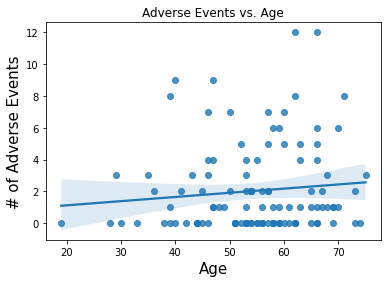

In [15]:
sns.regplot(x='age', y='nrAdvE', data=df)
plt.xlabel("Age",fontsize=15)
plt.ylabel("# of Adverse Events",fontsize=15)
plt.title('Adverse Events vs. Age')
plt.show()

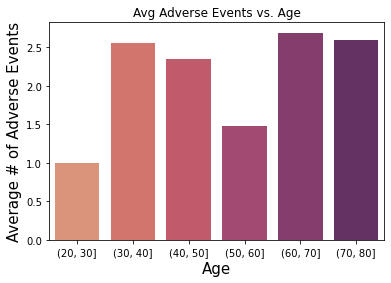

In [16]:
bins = pd.cut(df['age'], [20,30,40,50,60,70,80])
df1 = df.groupby(by=bins).agg(avg_advEvents=('nrAdvE', 'mean'))
sns.barplot(x=df1.index, y='avg_advEvents', data=df1, palette=sns.color_palette('flare'))
plt.xlabel("Age",fontsize=15)
plt.ylabel("Average # of Adverse Events",fontsize=15)
plt.title('Avg Adverse Events vs. Age')
plt.show()

There does not seem to be a linear trend in the effect of age on number of adverse events.  A non-linear correlation may be more appropriate. 

### The effect of Sex on Adverse Events

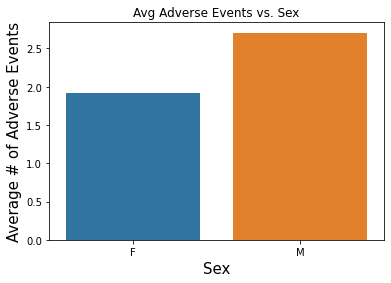

,avg_advEvents
sex,
F,1.920000
M,2.705882


In [17]:
df1 = df.groupby("sex").agg(avg_advEvents=('nrAdvE', 'mean'))
sns.barplot(x=df1.index, y='avg_advEvents', data=df1)
plt.xlabel("Sex",fontsize=15)
plt.ylabel("Average # of Adverse Events",fontsize=15)
plt.title('Avg Adverse Events vs. Sex')
plt.show()
df1

It seems that males are likely to have more adverse events independent of treatment.

### The effect of Treatment on Adverse Events

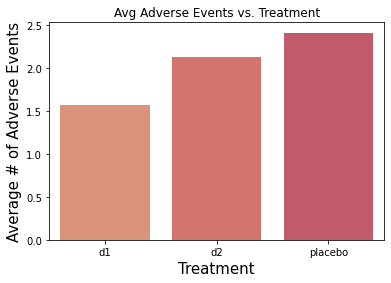

,avg_advEvents
treat,
d1,1.564103
d2,2.128205
placebo,2.410256


In [18]:
df1 = df.groupby('treat').agg(avg_advEvents=('nrAdvE', 'mean'))
sns.barplot(x=df1.index, y='avg_advEvents', data=df1, palette=sns.color_palette('flare'))
plt.xlabel("Treatment",fontsize=15)
plt.ylabel("Average # of Adverse Events",fontsize=15)
plt.title('Avg Adverse Events vs. Treatment')
plt.show()
df1

Based on the barplot above, treatments d1 and d2 were effective in reducing the number of adverse events.  This number reduced by 35.1% and 11.7% for d1 and d2 treatments, respectively.

### The effect of Treatment on Adverse Events by Sex

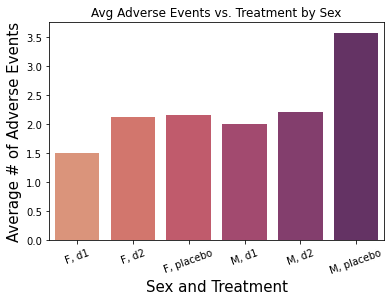

,sex,treat,avg_advEvents
0,F,d1,1.500000
1,F,d2,2.117647
2,F,placebo,2.156250
3,M,d1,2.000000
4,M,d2,2.200000
5,M,placebo,3.571429


In [19]:
df1 = df.groupby(['sex','treat'], as_index=False).agg(avg_advEvents=('nrAdvE', 'mean'))
plot = sns.barplot(x=df1.index, y='avg_advEvents', data=df1, palette=sns.color_palette('flare'))
plt.xlabel("Sex and Treatment",fontsize=15)
plt.ylabel("Average # of Adverse Events",fontsize=15)
plt.title('Avg Adverse Events vs. Treatment by Sex')
plot.set_xticklabels(['F, d1', 'F, d2', 'F, placebo', 'M, d1', 'M, d2', 'M, placebo'], rotation=20)
plt.show()
df1

The d1 and d2 treatments seem to be more effective for male patients with reductions in adverse events of 30.4% (d1) and 1.8% (d2) for female patients compared to 44.0% (d1) and 38.4% (d2) for male patients.  This may be due to the significantly high number of adverse events for male patients given the placebo.  Also, the sample size for males (17 patients) is significantly smaller than that for females (100 patients).

### The effect of Treatment on Adverse Events by Age

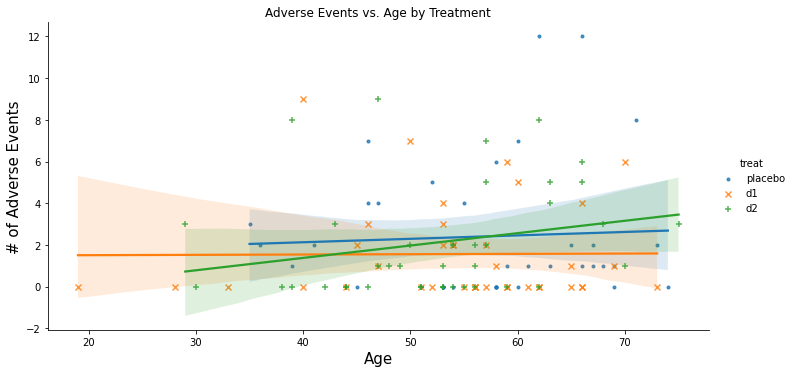

In [20]:
sns.lmplot(x="age", y="nrAdvE", hue="treat", markers = ['.', 'x', '+'], aspect=2, data=df);
plt.xlabel("Age",fontsize=15)
plt.ylabel("# of Adverse Events",fontsize=15)
plt.title('Adverse Events vs. Age by Treatment')
plt.show()

The lines represents the linear regression lines for the placebo and two treatments.  Treatment d1 is effective in reducing the average number of adverse events compared to the placebo at all ages.  Treatment d2 is effective at reducing this number when compared to the placebo for patients under the age of 58.

---

## Impact of Treatment on Patient Outcome (Statistical Analysis)

#### Z-test (alpha = 0.05) to test if the treatments reduced number of adverse events compared to placebo
##### Null hypothesis (H0): nrAdvE for placebo = nrAdvE for treatment (d1 or d2)
The two sample groups (placebo and treatment) are independent

In [21]:
#Store number of adverse events for placebo patients
placebo_advE = df.loc[df['treat']=='placebo','nrAdvE'].values
placebo_advE

array([ 4,  1,  2,  0,  0,  6,  8,  0,  2,  2,  0,  0,  0,  1,  1,  0,  0,
       12,  4,  0,  2,  5,  1,  1,  0,  0,  1,  7,  4,  2,  2, 12,  7,  1,
        3,  0,  1,  0,  2], dtype=int64)

In [22]:
#Store number of adverse events for d1 patients
d1_advE = df.loc[df['treat']=='d1','nrAdvE'].values
d1_advE

array([4, 2, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 2, 1, 2, 0, 2, 0, 0,
       0, 9, 0, 0, 4, 0, 0, 0, 0, 6, 5, 7, 6, 0, 1, 1, 0], dtype=int64)

In [23]:
#Store number of adverse events for d2 patients
d2_advE = df.loc[df['treat']=='d2','nrAdvE'].values
d2_advE

array([1, 1, 5, 2, 0, 0, 0, 5, 3, 9, 3, 3, 2, 0, 0, 0, 2, 8, 1, 0, 0, 0,
       0, 7, 0, 0, 4, 0, 6, 0, 3, 8, 5, 0, 2, 1, 0, 1, 1], dtype=int64)

In [24]:
from statsmodels.stats import weightstats

Z-Test for d1 compared to placebo:

In [25]:
d1_ztest,d1_pval = weightstats.ztest(placebo_advE, x2=d1_advE, value=0)
print("p-value",d1_pval)

p-value 0.17731934943591843


The p-value is greater than 0.05, so null hypothesis is accepted.  Therefore, it cannot be said with 95% confidence that the d1 treatment reduced the number of adverse events in patients compared to the placebo.

Z-Test for d2 compared to placebo:

In [26]:
d2_ztest,d2_pval = weightstats.ztest(placebo_advE, x2=d2_advE, value=0)
print("p-value",d2_pval)

p-value 0.6686980028986423


The p-value is greater than 0.05, so null hypothesis is accepted.  Therefore, it cannot be said with 95% confidence that the d2 treatment reduced the number of adverse events in patients compared to the placebo.

#### Proportion z-test (alpha = 0.05) to test if the proportion of successful patients (nrAdvE=0) is less than that of unsuccessful patients
##### Null hypothesis (H0): proportion of successful placebo patients = proportion of successful treatment patients
The two sample groups (placebo and treatment) are independent

In [27]:
#Store placebo patients successes
placebo_succ = df.loc[df['treat']=='placebo','success'].values
print('Placebo count: ', placebo_succ.size)
print('Placebo successes: ', placebo_succ.sum())

Placebo count:  39
Placebo successes:  13


In [28]:
#Store d1 patients successes
d1_succ = df.loc[df['treat']=='d1','success'].values
print('d1 count: ', d1_succ.size)
print('d1 successes: ', d1_succ.sum())

d1 count:  39
d1 successes:  21


In [29]:
#Store d2 patients successes
d2_succ = df.loc[df['treat']=='d2','success'].values
print('d2 count: ', d2_succ.size)
print('d2 successes: ', d2_succ.sum())

d2 count:  39
d2 successes:  16


Proportion-Test for d1 compared to placebo:

In [30]:
d1_propztest,d1_prop_pval = weightstats.ztest(placebo_succ, x2=d1_succ, value=0)
print("p-value",d1_prop_pval)

p-value 0.06532904832426993


The p-value is greater than 0.05, so null hypothesis is accepted. Therefore, it cannot be said with 95% confidence that the d1 treatment increased the success rate of patients compared to the placebo. 

Proportion-Test for d1 compared to placebo:

In [31]:
d2_propztest,d2_prop_pval = weightstats.ztest(placebo_succ, x2=d2_succ, value=0)
print("p-value",d2_prop_pval)

p-value 0.48642736153899246


The p-value is greater than 0.05, so null hypothesis is accepted. Therefore, it cannot be said with 95% confidence that the d2 treatment increased the success rate of patients compared to the placebo.